<a href="https://colab.research.google.com/github/soopertramp/Capstone-1-Submission/blob/main/AirBnb%20Bookings%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

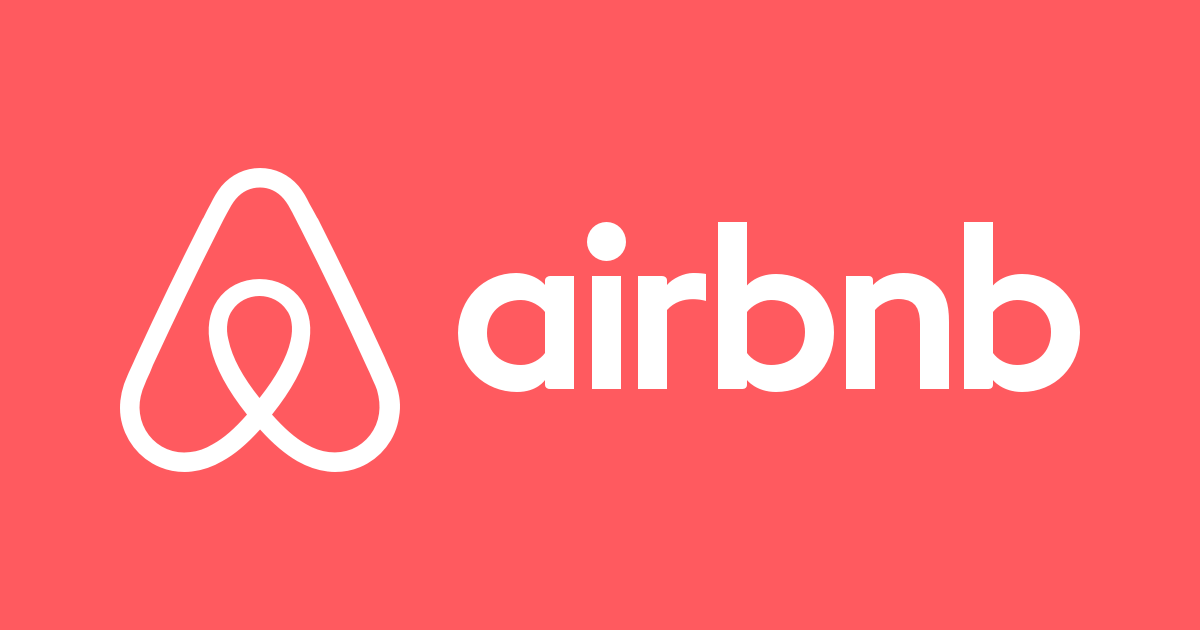

### **Buisness Context**

---

Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. 

This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. Let's Explore and analyse the data to discover key understandings.

---



---



### **Project Architecture**



---



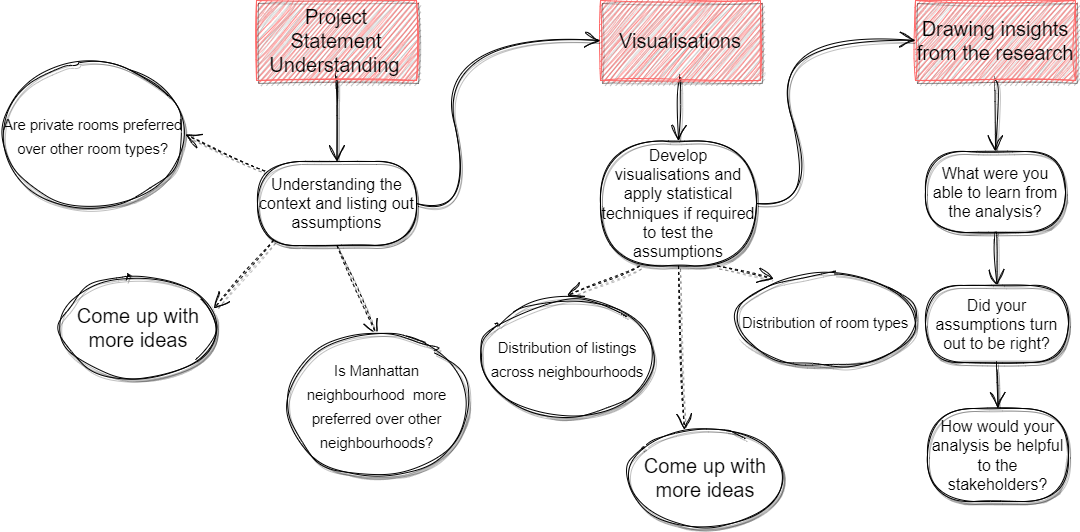

### **Feature information in details**

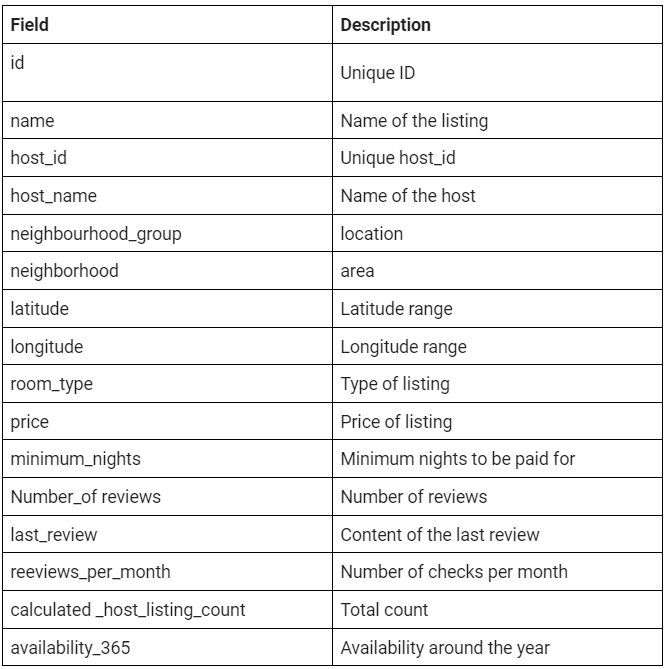

### **Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### **Taking a look at the first five rows to see how data is**

In [2]:
booking_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module - 1/Module 1 - Day 15 - Capstone Project/Airbnb NYC 2019.csv')
booking_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### **Checking the sahpe of the dataset shows how many rows and columns**

In [3]:
print(f'This dataset has {booking_df.shape} rows and columns respectively.')

This dataset has (48895, 16) rows and columns respectively.


### **info( ) gives a good overall information about the missing values and the data type of the every column**

In [4]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### **Checking for the null values and null values percentage & Visually representing it**

In [5]:
booking_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
round(booking_df.isnull().sum()/len(booking_df) * 100, 2)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

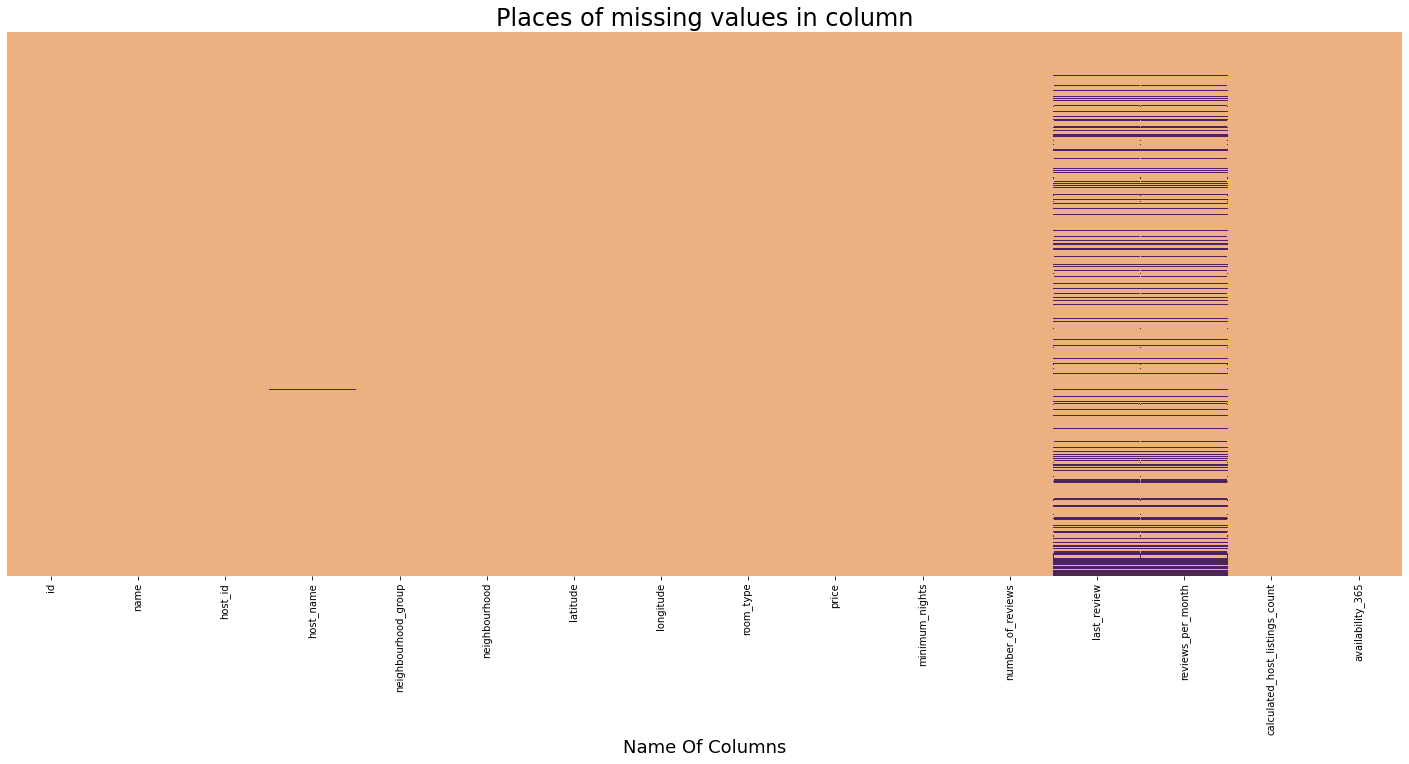

In [7]:
# Visulaizing null values through heatmap.

plt.figure(figsize=(25, 10))
sns.heatmap(booking_df.isnull(), cbar=False, yticklabels=False,cmap='flare')
plt.xlabel("Name Of Columns", fontsize=18)
plt.title("Places of missing values in column", fontsize=24)
plt.show()

**As we can see from above the column 'name', 'host_name', 'last_review', 'reviews_per_month' has the missing values**

### **The describe( ) method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column:** 
**count** - The number of not-empty values. <br>
**mean** - The average (mean) value. std - The standard deviation. 

In [8]:
booking_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### **I'm copying the dataframe to keep the original safe and conduct the missing value check and EDA going forward**

In [9]:
booking_df1 = booking_df.copy()

In [10]:
# Checking the duplicates

booking_df1.duplicated().sum()

0

**We have 0 duplicated values**

### **Either we can drop the null values or we can fill it as per the requirement and I'm going to drop the 'ID' column as it's not needed for this project and fill the rest of the columns column 'name', 'host_name', 'last_review', 'reviews_per_month'**

In [11]:
booking_df1.drop('id', axis = 1, inplace = True)
booking_df1.fillna({'name' : 'No_Name'}, inplace = True )
booking_df1.fillna({'host_name' : 'No_Name'}, inplace = True )
booking_df1.fillna({'last_review' : 'Not_Revieved'}, inplace = True )
booking_df1.fillna({'reviews_per_month' : '0'}, inplace = True )

In [12]:
booking_df1.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**Yay! Missing Value Treatment is done**

### **Let's Get on With the EDA**

### **1. Which 'neighbourhood_group' has the highest number of AirBnb's ?**

In [13]:
booking_df1['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

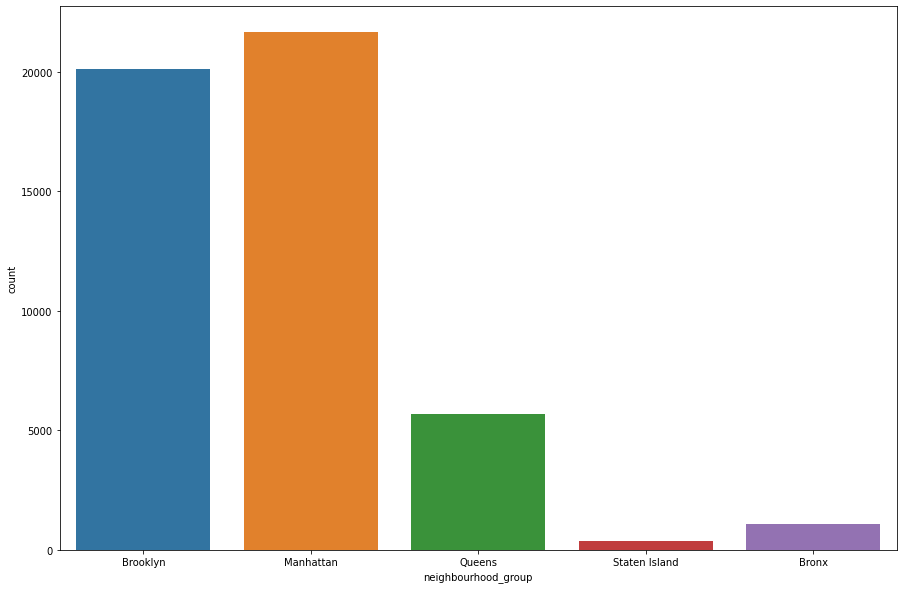

In [14]:
plt.figure(figsize = (15,10))
sns.countplot('neighbourhood_group', data = booking_df1)
plt.show()

**As we can see from the bar chart above Manhattan neighbourhood has the highest number of AirBnb's**

1. Manhattan
2. Brooklyn
3. Queens
4. Bronx
5. Stanten Island

And Manhattan and Brooklyn has more than 75% of the AirBnb's.

In [15]:
neighbourhood = booking_df1.groupby('neighbourhood_group')['neighbourhood_group'].count()
neighbourhood = pd.DataFrame(neighbourhood)
neighbourhood.rename(columns = {'neighbourhood_group' : 'No of AirBnbs'}, inplace = True)
neighbourhood

,No of AirBnbs
neighbourhood_group,
Bronx,1091
Brooklyn,20104
Manhattan,21661
Queens,5666
Staten Island,373


In [16]:
neighbourhood/(sum(neighbourhood['No of AirBnbs'] / 100))

,No of AirBnbs
neighbourhood_group,
Bronx,2.231312
Brooklyn,41.116679
Manhattan,44.301053
Queens,11.588097
Staten Island,0.762859


**Now Precisely we can 85.41 ~ 86% AirBnb's are there in Manhattan and Brooklyn**

### **2. Which type of properties are there in all the neighbourhood ?**

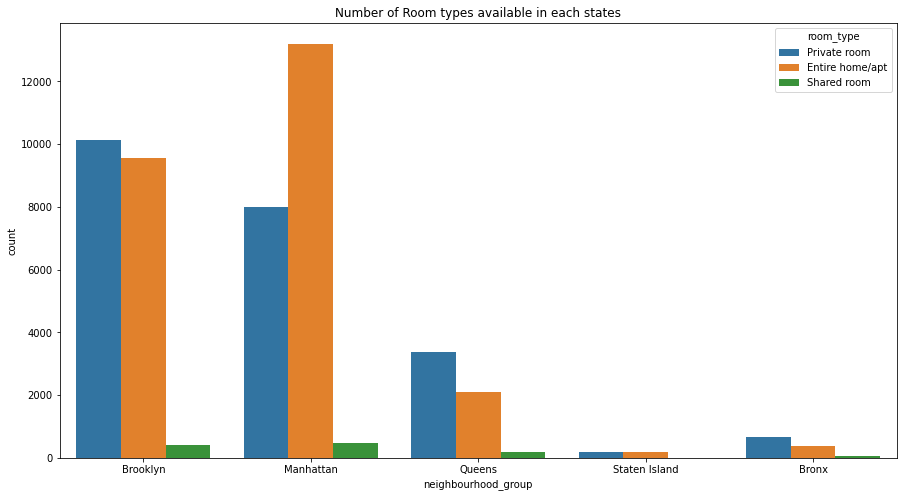

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(booking_df1['neighbourhood_group'],hue=booking_df1['room_type'])
plt.title('Number of Room types available in each states')
plt.show()

1. **Brooklyn** has Highest number of **Private Rooms**

2. **Manhattan** has Highest number of **Entire Home/Apartment**

3. **Manhattan** has Highest number of **Shared Room**

### **3. Which properties are the busiest Host in terms of Number of Bookings ?**

In [18]:
# return which host has the highest bookings

highest_bookings= booking_df.groupby(['neighbourhood_group','name'])['name'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

top_ten_highest_bookings= highest_bookings[:10]

top_ten_highest_bookings

,neighbourhood_group,name,Most_Bookings
44574,Queens,Hillside Hotel,18
5259,Brooklyn,Brooklyn Apartment,12
12120,Brooklyn,Loft Suite @ The Box House Hotel,11
2826,Brooklyn,Artsy Private BR in Fort Greene Cumberland,10
15315,Brooklyn,Private room in Williamsburg,8
44610,Queens,Home away from home,8
7665,Brooklyn,Cozy Brooklyn Apartment,8
3381,Brooklyn,Beautiful Brooklyn Brownstone,8
15272,Brooklyn,Private room in Brooklyn,8
29998,Manhattan,Harlem Gem,7


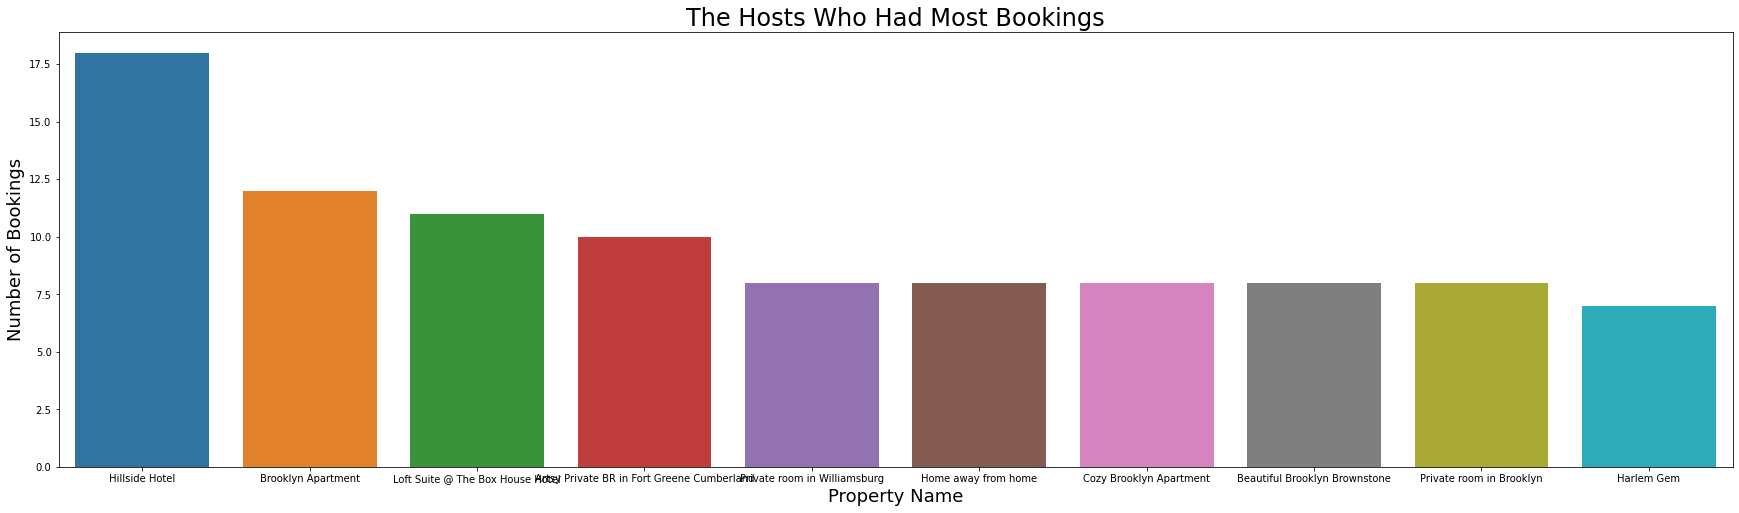

In [19]:
#Visualizaing the top_ten_highest_bookings

plt.figure(figsize=(30,8))
sns.barplot(x = top_ten_highest_bookings['name'],y = top_ten_highest_bookings['Most_Bookings'])
plt.xlabel('Property Name', fontsize = 18)
plt.ylabel('Number of Bookings',fontsize = 18)
plt.title("The Hosts Who Had Most Bookings",fontsize = 24)
plt.show()

**As we can see from above Hillside Hotel property in Queens had the most number of bookings followed by Brooklyn Apartment in Brooklyn and Loft Suite at Brooklyn.** 

### **4. Who are the busiest Host in terms of Number of Bookings with host name ?**

In [20]:
host = booking_df1[['neighbourhood_group','host_name']].value_counts().reset_index().head(10)
host.rename(columns = {0 : 'Most_Bookings'}, inplace = True)
host

,neighbourhood_group,host_name,Most_Bookings
0,Manhattan,Sonder (NYC),327
1,Manhattan,Blueground,230
2,Manhattan,Michael,212
3,Manhattan,David,202
4,Brooklyn,Michael,159
5,Manhattan,John,151
6,Brooklyn,David,142
7,Manhattan,Kara,135
8,Manhattan,Mike,134
9,Manhattan,Alex,134


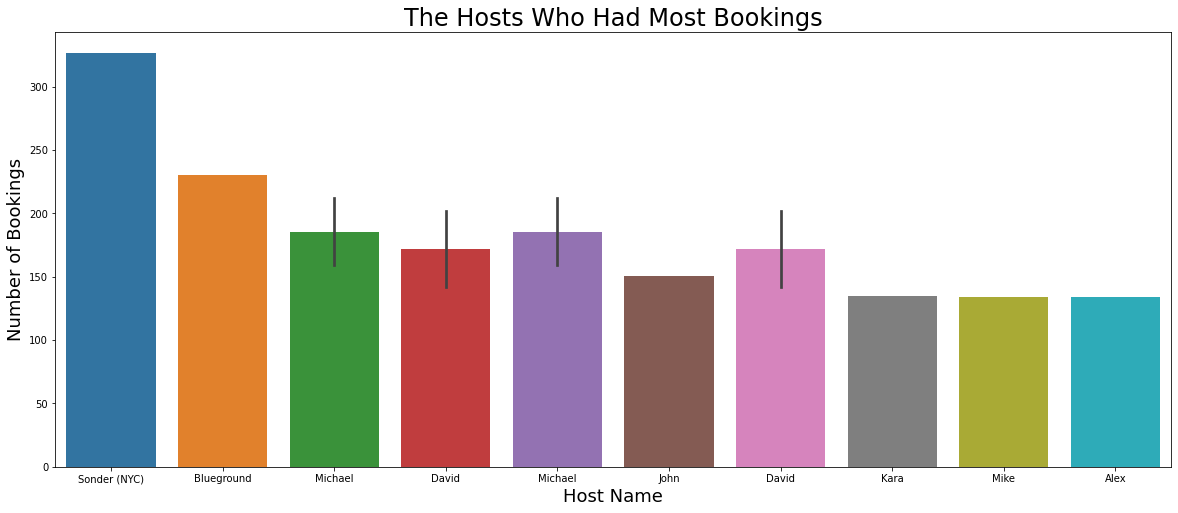

In [21]:
#Visualizaing the busiest Host in terms of Number of Bookings with host name

plt.figure(figsize=(20,8))
sns.barplot(x = host['host_name'], y = host['Most_Bookings'] ,order = host['host_name'])
plt.xlabel('Host Name', fontsize = 18)
plt.ylabel('Number of Bookings',fontsize = 18)
plt.title("The Hosts Who Had Most Bookings",fontsize = 24)
plt.show()

**As we can see from above Sonder (NYC) at manhattan had the most number of bookings followed by Blueground at manhattan and Michael at manhattan.** 

### **5. If I choose Brooklyn Neigborhood to live there for 20 days. Let's check it will be cheaper to stay there compare to other neighborhoods or not.**

In [22]:
import plotly.express as px

In [23]:
brook_df = booking_df1.loc[booking_df1['neighbourhood_group'].isin(['Brooklyn', 'Manhattan', 'Queens', 'Bronx'])]

In [24]:
fig = px.bar(x = 'neighbourhood_group',y = 'price', data_frame = brook_df.groupby(['neighbourhood_group']).mean().reset_index(), text='neighbourhood_group',
             color = 'neighbourhood_group',opacity = .8)
fig.update_traces(textfont=dict(size=15,color='White'))
fig.update_layout(title='Neigborhood based on the property prices',yaxis=dict(showgrid=False,showticklabels=True),autosize=False,width=800,height=500)
fig.show()

#### **From the above bar chart we can conclude:**

1. **Brooklyn is not the cheapest nor the costliest neighbourhood to stay**

2. **Manhattan is the costliest place to stay**

3. **Bronx is the cheapest neighbourhood to stay**

### **6. As we see Bronx neighborhood is the cheaper place to stay so which room type can I prefer and area(neighborhood) best to visit at Affordable cost.**

In [25]:
bronx_data = brook_df.loc[brook_df.neighbourhood_group=='Bronx']

fig = px.bar(x='neighbourhood',y='price',data_frame=bronx_data.groupby(['neighbourhood','room_type']).mean().reset_index(),color='room_type',barmode='group',opacity=.7)
fig.update_layout(title='Bronx Room type and Properties to Stay in Bronx at Affordable Cost',yaxis_title='Average Price Per Night',yaxis=dict(showgrid=False,
        showticklabels=True),autosize=False,width=2000,height=700)
fig.show()

**From the above bar chart we can conclude:**

**1. Riverdale is the most expensive area to stay for both Private and Shared Rooms**

**2. City Island is the most expensive for Entire Home/ Apt**

**3. Cheapest or More Affordable Private room is available at Van Nest** 

**4. Cheapest or More Affordable Shared room is available at Morris Heights, Pehlam Gardens, Schuylerville and Van Nest** 

**5. Cheapest or More Affordable Entire Home/ Apt is available at Woodlawn** 

### **7. If i choose to stay in Manhattan, which room type can I prefer and area(neighborhood) best to visit at Affordable cost.**

In [26]:
manhattan_data = brook_df.loc[brook_df.neighbourhood_group=='Manhattan']

fig = px.bar(x='neighbourhood',y='price',data_frame = manhattan_data.groupby(['neighbourhood','room_type']).mean().reset_index(),color='room_type',barmode='group',opacity=.7)
fig.update_layout(title='Manhattan Room type and Properties to Stay in Manhattan at Affordable Cost',yaxis_title='Average Price Per Night',yaxis=dict(showgrid=False,
        showticklabels=True),autosize=False,width=2000,height=700)
fig.show()

**From the above bar chart we can conclude:**

**1. Tribeca is the most expensive area to stay for Entire Home/ Apt**

**2. Midtown is the most expensive area to stay for Private Room**

**3. Financial District is the most expensive area to stay for Shared room**

**4. Cheapest or More Affordable Private room is available at Washington Heights** 

**5. Cheapest or More Affordable Shared room is available at Roosevelt Island** 

**6. Cheapest or More Affordable Entire Home/ Apt is available at Marble Hill** 

### **8. Assume I stayed in Manhattan for 20 days & I had a balance amount of 5000$ only.Then I decided to stay other 20 days at Queens. Is this amount is sufficient only for room expenses?**

In [27]:
queens_df = booking_df1.loc[booking_df1['neighbourhood_group'].isin(['Queens'])]
price = queens_df['price'].mean()*20
price = round(price, 2)

if price <= 5000:
    print(f'The average amount to stay in Queens for 20 days is {price} $. We think your amount is more than Sufficient to stay there.')
else:
    print("The amount exceeds your budget plan for room in Queens.")

The average amount to stay in Queens for 20 days is 1990.35 $. We think your amount is more than Sufficient to stay there.


### **9. Since money is sufficient stay for 20 days, which type of luxury property can you select to stay at Queens**

In [28]:
luxury_df = queens_df.groupby(['room_type'])['price'].mean()
luxury_df

room_type
Entire home/apt    147.050573
Private room        71.762456
Shared room         69.020202
Name: price, dtype: float64

In [29]:
my_labels = ('Entire home/apt', 'Private room', 'Shared room')

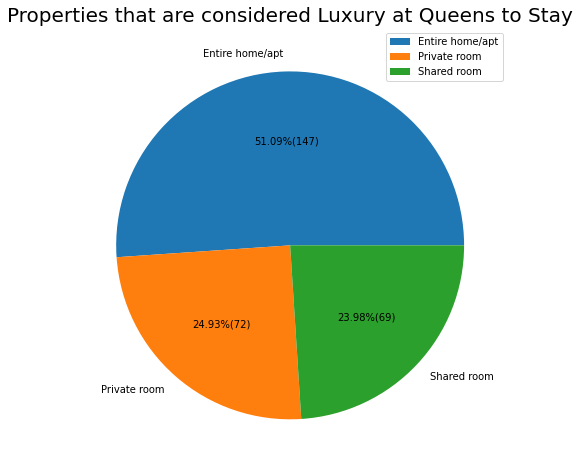

In [30]:
plt.figure(figsize = (15,8))
plt.pie(luxury_df, labels = my_labels, autopct = lambda p: '{:.02f}%({:.0f})'.format(p,(p/100)*luxury_df.sum()))
plt.title('Properties that are considered Luxury at Queens to Stay', fontsize = 20)
plt.legend()
plt.show()

**Entire home/Apt is considered tio be luxury in the Queens Neighborhod so staying there for 20 days is both affordable and luxurious at 147 $.**

### **10. Most visited properties based on number of reviews**

In [31]:
booking_df1.loc[:,['name','number_of_reviews']].groupby(['name'])['number_of_reviews'].sum().sort_values(ascending=False)[:10]

name
Private Bedroom in Manhattan                         666
Room near JFK Queen Bed                              629
Beautiful Bedroom in Manhattan                       617
Great Bedroom in Manhattan                           607
Room Near JFK Twin Beds                              576
Steps away from Laguardia airport                    543
Manhattan Lux Loft.Like.Love.Lots.Look !             540
Cozy Room Family Home LGA Airport NO CLEANING FEE    510
Private brownstone studio Brooklyn                   488
Loft Suite @ The Box House Hotel                     481
Name: number_of_reviews, dtype: int64

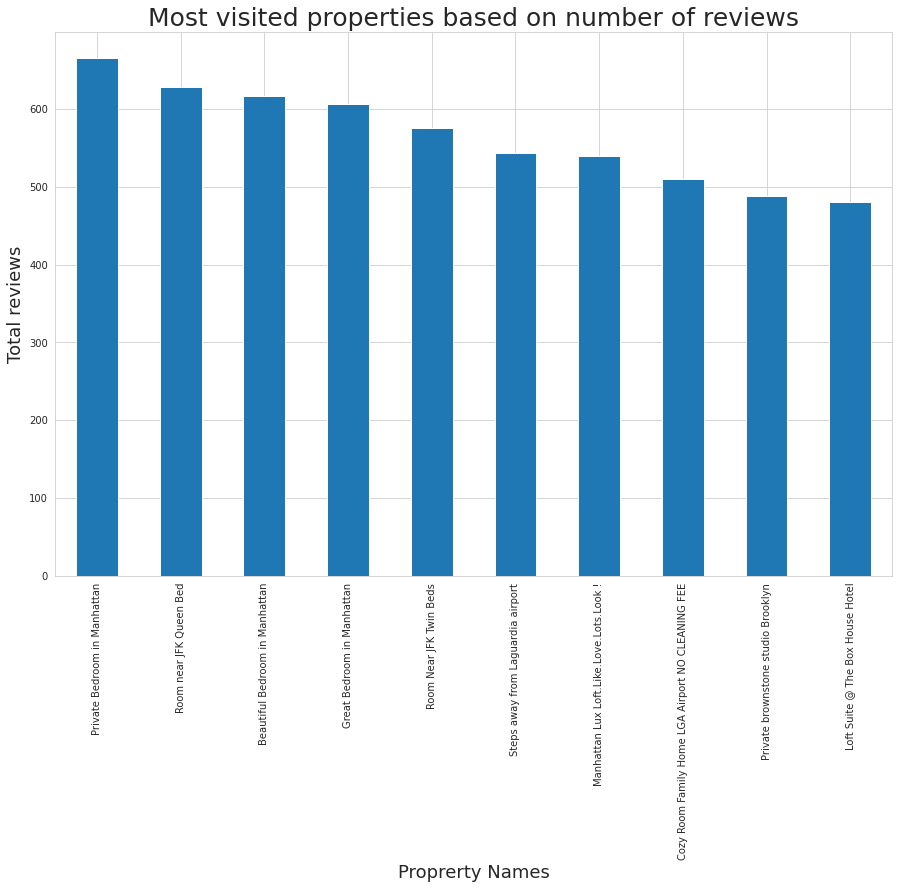

In [36]:
booking_df1.loc[:,['name','number_of_reviews']].groupby(['name'])['number_of_reviews'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15,10)
plt.title('Most visited properties based on number of reviews', fontsize = 25)
plt.xlabel('Proprerty Names', fontsize = 18)
plt.ylabel('Total reviews', fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

**Top 3 properties visited by People based on number of reviews are :**

**1. Private Bedroom in Manhattan**

**2. Room near JFK Queen Bed**

**3. Beautiful Bedroom in Manhattan**

In [33]:
Box = (booking_df1.longitude.min(), booking_df1.longitude.max(), booking_df1.latitude.min(), booking_df1.latitude.max())

In [34]:
ny_map = plt.imread('/content/drive/MyDrive/Colab Notebooks/Module - 1/Module 1 - Day 15 - Capstone Project/NY Map.png')

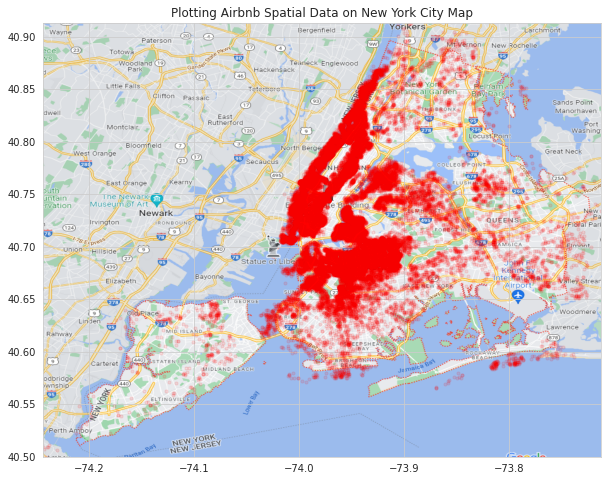

In [35]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(booking_df1.longitude, booking_df1.latitude, zorder=1, alpha= 0.1, c='red', s=10)
ax.set_title('Plotting Airbnb Spatial Data on New York City Map')
ax.set_xlim(Box[0],Box[1])
ax.set_ylim(Box[2],Box[3])
ax.imshow(ny_map, zorder=0, extent = Box, aspect= 'equal')
plt.show()